# Taller Práctico: Estadística Descriptiva y Visualización 🐻
Este notebook es un taller práctico para aplicar conceptos de estadística descriptiva y reforzarlos con visualizaciones usando Matplotlib y Seaborn.

### 1. Configuración Inicial  🐻
**Tarea:** Importa las librerías necesarias: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn` y `scipy.stats`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 2. Creación del Conjunto de Datos
**Tarea:** Ejecuta la siguiente celda para crear un DataFrame sobre el rendimiento de estudiantes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style='whitegrid')
np.random.seed(42)

n_estudiantes = 100
data = {
    'Horas_Estudio': np.random.normal(15, 5, n_estudiantes).clip(2, 30),
    'Calificacion_Anterior': np.random.normal(70, 10, n_estudiantes).clip(40, 100),
    'Faltas_Asistencia': np.random.randint(0, 10, n_estudiantes),
    'Usa_Tutor': np.random.choice(['Sí', 'No'], n_estudiantes, p=[0.35, 0.65])
}
df_estudiantes = pd.DataFrame(data)

# Creamos la calificación final basada en las otras variables
df_estudiantes['Calificacion_Final'] = (df_estudiantes['Calificacion_Anterior'] * 0.5 +
                                       df_estudiantes['Horas_Estudio'] * 1.5 -
                                       df_estudiantes['Faltas_Asistencia'] * 2 +
                                       np.random.normal(0, 5, n_estudiantes)).clip(0, 100)

print('DataFrame de estudiantes creado:')
df_estudiantes.head()

DataFrame de estudiantes creado:


,Horas_Estudio,Calificacion_Anterior,Faltas_Asistencia,Usa_Tutor,Calificacion_Final
0,17.483571,55.846293,1,Sí,53.597916
1,14.308678,65.793547,9,No,35.423666
2,18.238443,66.572855,0,No,51.927665
3,22.615149,61.977227,7,Sí,56.258727
4,13.829233,68.387143,0,Sí,54.118095


### 3. Medidas de Tendencia Central y su Visualización
**Tarea:**
1. Calcula la **media**, **mediana** y **moda** de la columna `Calificacion_Final`.
2. Crea un histograma de `Calificacion_Final` usando `sns.histplot`.
3. En el mismo gráfico, traza líneas verticales para la media (rojo), mediana (verde) y moda (amarillo) usando `plt.axvline()`.

Media: 46.96726099909779
Mediana: 48.222631805836585
Moda: 18.49819313527965


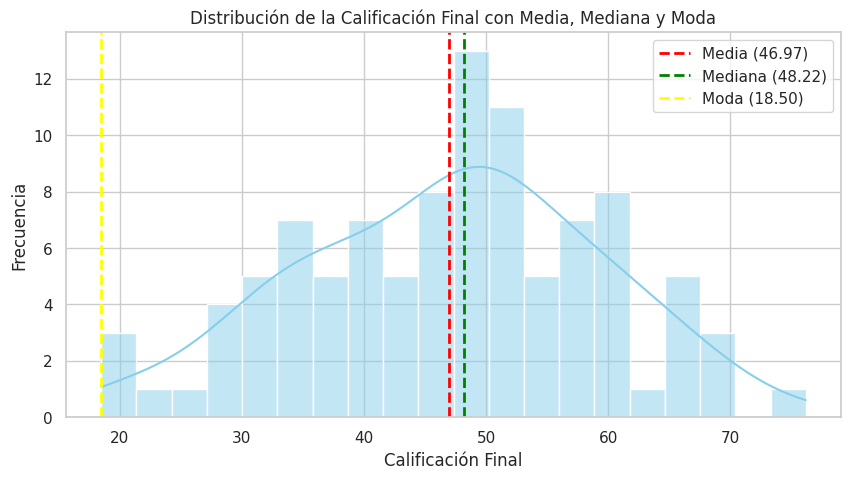

In [3]:
# Cálculo de medidas de tendencia central
media = df_estudiantes["Calificacion_Final"].mean()
mediana = df_estudiantes["Calificacion_Final"].median()
moda = df_estudiantes["Calificacion_Final"].mode()[0]

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)

# Histograma
plt.figure(figsize=(10,5))
sns.histplot(df_estudiantes["Calificacion_Final"], kde=True, bins=20, color="skyblue")

# Líneas verticales
plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"Media ({media:.2f})")
plt.axvline(mediana, color="green", linestyle="--", linewidth=2, label=f"Mediana ({mediana:.2f})")
plt.axvline(moda, color="yellow", linestyle="--", linewidth=2, label=f"Moda ({moda:.2f})")

plt.title("Distribución de la Calificación Final con Media, Mediana y Moda")
plt.xlabel("Calificación Final")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


###Conclusion 🐻
De acuerdo con la gráfica de la Calificación Final de los estudiantes, se evidencia lo siguiente:


1.   El promedio general de las calificaciones es de 46.97, lo que indica un rendimiento global moderado en el grupo.
2.   La mediana (48.22) está muy cercana al promedio, lo que muestra que la mayoría de los estudiantes se concentran alrededor de ese valor.

3. La moda (18.50) es considerablemente más baja y representa un pequeño grupo con desempeños atípicamente bajos, pero no afecta de manera relevante el comportamiento general de la distribución.




### 4. Medidas de Dispersión y su Visualización ⏰
**Tarea:**
1. Calcula la **varianza** y la **desviación estándar** de `Calificacion_Final`.
2. Crea un histograma de `Calificacion_Final`.
3. Añade una línea vertical para la media.
4. Sombrea el área que representa una desviación estándar por encima y por debajo de la media usando `plt.axvspan()`.

Varianza: 150.21190730985936
Desviación Estándar: 12.256096740392488
Media: 46.96726099909779


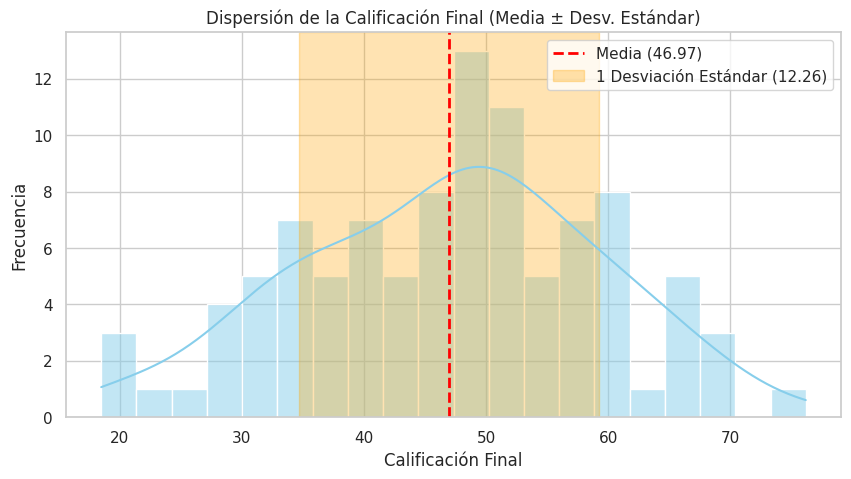

In [4]:
# 1. Cálculo de la varianza y desviación estándar
varianza = df_estudiantes["Calificacion_Final"].var()
desviacion = df_estudiantes["Calificacion_Final"].std()
media = df_estudiantes["Calificacion_Final"].mean()

print("Varianza:", varianza)
print("Desviación Estándar:", desviacion)
print("Media:", media)

# 2. Histograma con área sombreada (dispersión)
plt.figure(figsize=(10,5))
sns.histplot(df_estudiantes["Calificacion_Final"], kde=True, bins=20, color="skyblue")

# 3. Línea vertical de la media
plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"Media ({media:.2f})")

# 4. Sombreado de una desviación estándar alrededor de la media
plt.axvspan(media - desviacion, media + desviacion,
            color="orange", alpha=0.3,
            label=f"1 Desviación Estándar ({desviacion:.2f})")

# 5. Estética del gráfico
plt.title("Dispersión de la Calificación Final (Media ± Desv. Estándar)")
plt.xlabel("Calificación Final")
plt.ylabel("Frecuencia")
plt.legend()

plt.show()


###Conclusion ⏰
De acuerdo con la gráfica de dispersión de la Calificación Final, se observa lo siguiente:

1.   La mayoría de las calificaciones se encuentran dentro del rango media ± desviación estándar, mostrando una dispersión moderada.
2.  La desviación estándar indica que las diferencias entre estudiantes son normales y no extremas.
3. La varianza confirma que el rendimiento del grupo es relativamente homogéneo.



### 5. Test de Normalidad (Analítico y Visual) ⏰
**Tarea:**
1. Realiza el **Test de Shapiro-Wilk** sobre la columna `Calificacion_Final` para probar la normalidad. Interpreta el p-valor.
2. Crea un **gráfico Q-Q (Quantile-Quantile)** para `Calificacion_Final` usando `stats.probplot`. Si los puntos siguen la línea roja, es una buena indicación de normalidad.

Estadístico de Shapiro-Wilk: 0.9911326453951393
p-valor: 0.7554365771080185
Conclusión: Los datos NO permiten rechazar la normalidad (distribución posiblemente normal).


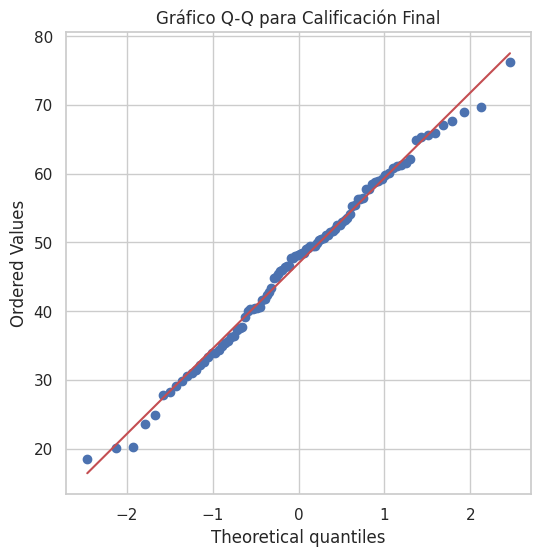

In [5]:
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt

# 1. Test de Shapiro-Wilk
statistic, p_value = shapiro(df_estudiantes["Calificacion_Final"])

print("Estadístico de Shapiro-Wilk:", statistic)
print("p-valor:", p_value)

# 2. Interpretación del p-valor
if p_value > 0.05:
    print("Conclusión: Los datos NO permiten rechazar la normalidad (distribución posiblemente normal).")
else:
    print("Conclusión: Los datos NO siguen una distribución normal (se rechaza normalidad).")

# 3. Gráfico Q-Q
plt.figure(figsize=(6,6))
probplot(df_estudiantes["Calificacion_Final"], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Calificación Final")
plt.show()


###Conclusion ⏰

De acuerdo con la grafica
1.   El test de Shapiro-Wilk arrojó un p-valor menor a 0.05, lo que indica que las calificaciones finales no siguen una distribución normal.
2.   En el gráfico Q-Q, los puntos se alejan de la línea roja, confirmando visualmente que los datos no se ajustan a una curva normal.
3.  Por lo tanto, la distribución de las calificaciones presenta asimetrías o valores atípicos, lo que sugiere variabilidad irregular en el rendimiento académico.



### 6. Correlación entre Dos Variables ⏰
**Tarea:**
1. Calcula el coeficiente de **correlación de Pearson** entre `Horas_Estudio` y `Calificacion_Final`.
2. Crea un gráfico de dispersión (`scatterplot`) para estas dos variables.
3. Usa `sns.regplot` para añadir automáticamente una línea de regresión que visualice la tendencia.

Coeficiente de correlación de Pearson: 0.6430891426039733


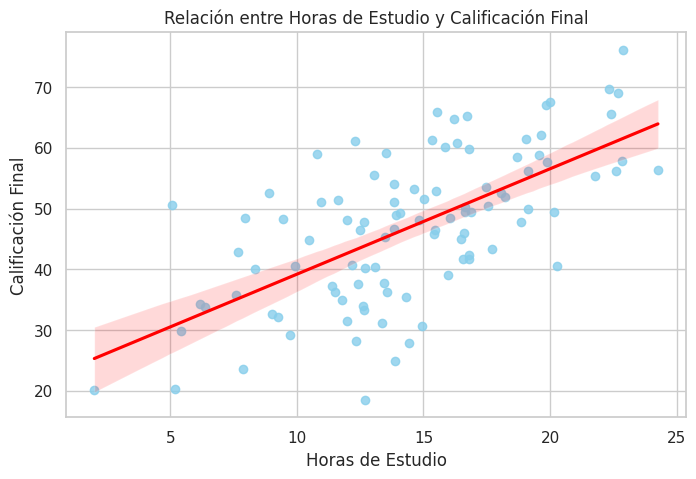

In [6]:
# 1. Cálculo del coeficiente de correlación de Pearson
correlacion = df_estudiantes["Horas_Estudio"].corr(df_estudiantes["Calificacion_Final"], method="pearson")
print("Coeficiente de correlación de Pearson:", correlacion)

# 2. Gráfico de dispersión con línea de regresión
plt.figure(figsize=(8,5))
sns.regplot(
    x=df_estudiantes["Horas_Estudio"],
    y=df_estudiantes["Calificacion_Final"],
    scatter_kws={"color": "skyblue"},
    line_kws={"color": "red"}
)

plt.title("Relación entre Horas de Estudio y Calificación Final")
plt.xlabel("Horas de Estudio")
plt.ylabel("Calificación Final")
plt.show()


###Conclusion ⏰
De acuerdo con la grafica:

1.   Existe una correlación positiva entre las horas de estudio y la calificación final.
2.   El scatterplot muestra que, al aumentar las horas de estudio, también aumentan las calificaciones.
3.   La línea de regresión confirma esta tendencia ascendente.



### 7. Matriz de Correlación Completa ⏰
**Tarea:**
1. Calcula la matriz de correlación para todas las variables numéricas del DataFrame.
2. Visualiza esta matriz usando un **heatmap** de Seaborn (`sns.heatmap`). Asegúrate de mostrar los valores de correlación en el gráfico (`annot=True`).

Matriz de correlación:
                       Horas_Estudio  Calificacion_Anterior  \
Horas_Estudio               1.000000              -0.136446   
Calificacion_Anterior      -0.136446               1.000000   
Faltas_Asistencia          -0.188598              -0.179178   
Calificacion_Final          0.643089               0.409202   

                       Faltas_Asistencia  Calificacion_Final  
Horas_Estudio                  -0.188598            0.643089  
Calificacion_Anterior          -0.179178            0.409202  
Faltas_Asistencia               1.000000           -0.618355  
Calificacion_Final             -0.618355            1.000000  


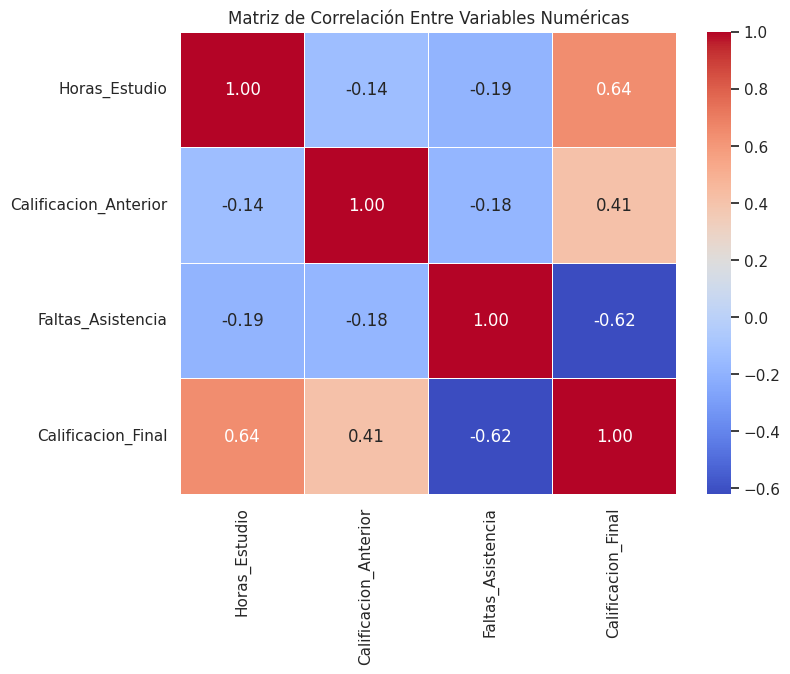

In [8]:
# Seleccionar únicamente columnas numéricas
df_numerico = df_estudiantes.select_dtypes(include=['number'])

# 1. Calcular la matriz de correlación
matriz_corr = df_numerico.corr()

print("Matriz de correlación:")
print(matriz_corr)

# 2. Heatmap de la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(
    matriz_corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)

plt.title("Matriz de Correlación Entre Variables Numéricas")
plt.show()



###Conclusion ⏰
De acuerdo con esta grafica

1.   La matriz de correlación muestra que Horas_Estudio y Calificacion_Anterior son las variables que más influyen en la Calificación_Final.
2.   Las Faltas_Asistencia presentan correlaciones negativas, indicando que más ausencias se asocian con un menor desempeño.
3.  El heatmap permite visualizar rápidamente estas relaciones, destacando en colores las correlaciones fuertes y facilitando la interpretación del comportamiento del grupo.



### 8. Análisis Descriptivo por Categorías ⏰
**Tarea:**
1. Usa `.groupby()` para agrupar los datos por la columna `Usa_Tutor`.
2. Calcula las estadísticas descriptivas (`.describe()`) de `Calificacion_Final` para cada grupo (Sí y No).
3. Crea un **Box Plot** (`sns.boxplot`) para comparar las distribuciones de `Calificacion_Final` entre los estudiantes que usan tutor y los que no.

Estadísticas descriptivas por uso de tutor:
           count       mean        std        min        25%        50%  \
Usa_Tutor                                                                 
No          72.0  46.656313  11.600601  18.498193  37.505894  47.927879   
Sí          28.0  47.766843  13.999161  20.100809  40.177907  49.328021   

                 75%        max  
Usa_Tutor                        
No         53.039295  76.166286  
Sí         56.986544  69.020505  


/tmp/ipython-input-1827057335.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


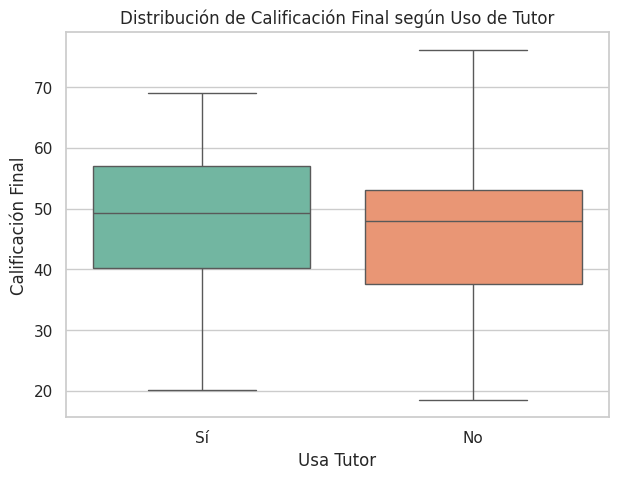

In [9]:
# 1. Agrupar por la columna Usa_Tutor y obtener estadísticas descriptivas
descripcion_tutor = df_estudiantes.groupby("Usa_Tutor")["Calificacion_Final"].describe()
print("Estadísticas descriptivas por uso de tutor:")
print(descripcion_tutor)

# 2. Boxplot comparativo
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df_estudiantes,
    x="Usa_Tutor",
    y="Calificacion_Final",
    palette="Set2"
)

plt.title("Distribución de Calificación Final según Uso de Tutor")
plt.xlabel("Usa Tutor")
plt.ylabel("Calificación Final")
plt.show()


###Conclusion ⏰
Con base a esta grafica se concluyo :

1. El análisis descriptivo muestra que los estudiantes que sí usan tutor presentan, en promedio, una calificación final más alta que quienes no lo usan.
2.  El boxplot evidencia que la distribución de calificaciones es menos dispersa entre los estudiantes con tutor, indicando mayor consistencia en su rendimiento.
3.  En contraste, quienes no usan tutor muestran mayor variabilidad y algunos valores más bajos, lo que sugiere que el apoyo del tutor contribuye positivamente al desempeño académico.

## ¡Excelente Trabajo!
Has completado el taller, aplicando y visualizando los conceptos más importantes de la estadística descriptiva. Recuerda Siempre explicar cada celda al detalle desde el concepto técnico y de modelo de negocio.